    #Proprietary content. © Great Learning and IIT Madras. All Rights Reserved. Unauthorized use or distribution prohibited.

# Problem Statement

Given a dataset spanning April 2005 to September 2005, containing customer information and credit card payment details, the objective is to analyze factors influencing customer credibility. Through variables such as credit limits, repayment statuses, bill amounts, and payment history, this study aims to differentiate between credible and non-credible customers. By exploring demographic attributes like gender, education, marital status, and age, alongside financial behaviors, the goal is to uncover patterns indicative of credit reliability. Insights derived from this analysis can inform financial institutions' risk assessment and decision-making processes when extending credit facilities.

In [92]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.26.4
2.2.1
0.13.2


### Describe the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Load the dataset and describe the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
# Read the dataset
credit = pd.read_csv('credit_card.csv')
credit.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [95]:
## Size of the dataset
credit.shape

(30000, 25)

In [96]:
# Information about features
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  int64  
 2   GENDER     30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        29990 non-null  float64
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  int64  
 13  BILL_AMT2  30000 non-null  int64  
 14  BILL_AMT3  30000 non-null  int64  
 15  BILL_AMT4  30000 non-null  int64  
 16  BILL_AMT5  30000 non-null  int64  
 17  BILL_AMT6  30000 non-null  int64  
 18  PAY_AMT1   30000 non-null  int64  
 19  PAY_AMT2   30000 non-null  int64  
 20  PAY_AM

In [97]:
credit.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,29990.0,35.487062,9.236845,-20.0,28.00,34.0,41.00,120.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check for duplicates. Remove if any are found
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# Are there any duplicates?
dups = credit.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
credit[dups]

Number of duplicate rows = 0


,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT


In [99]:
pd.options.display.max_columns = None

In [100]:
credit.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29990.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.487062,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.236845,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,-20.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,120.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##### Observations:

- Dataset has 25 columns and 30,000 rows
- The entire dataset is of integer data type. However, we understand Gender, Education, Marriage, Pay_’X’  columns and Default      are categorical in nature
- The dataset provided is for a 6-month bill cycle period
- Column names for PAY_X, BILL_AMTX, PAY_AMTX will be more meaningful if associated with their respective months
- The target column is already in 1-0 number format, with respect to whether a customer will default or not
- No duplicate records
- At an overview, Age feature has null values
- Age has a minimum value as -20 and maximum value as 120. This has to cleaned.
- Minimum values of Bill Amount fields have negative values. This seems to be valid if customers have done some advance payments

### Data Pre-processing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Refer the data-dictionary and replace numbers with names of month respectively
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [102]:
# Renaming the column names with their corresponding month
credit.columns = ['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
                  'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
                 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
                 'DEFAULT']

In [103]:
credit.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,1,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [104]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,29990.0,35.487062,9.236845,-20.0,28.00,34.0,41.00,120.0
PAY_SEP,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Refer the data dictionary and compare with current data type of columns if there is discrepancy change the data type of variable to appropriate data type.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
## Converting the categorical columns in to object datatype
credit['GENDER']= credit['GENDER'].astype(object)
credit['EDUCATION']= credit['EDUCATION'].astype(object)
credit['MARRIAGE']= credit['MARRIAGE'].astype(object)
credit['PAY_SEP']= credit['PAY_SEP'].astype(object)
credit['PAY_AUG']= credit['PAY_AUG'].astype(object)
credit['PAY_JUL']= credit['PAY_JUL'].astype(object)
credit['PAY_JUN']= credit['PAY_JUN'].astype(object)
credit['PAY_MAY']= credit['PAY_MAY'].astype(object)
credit['PAY_APR']= credit['PAY_APR'].astype(object)
credit['DEFAULT']= credit['DEFAULT'].astype(object)

In [106]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIMIT_BAL     30000 non-null  int64  
 2   GENDER        30000 non-null  object 
 3   EDUCATION     30000 non-null  object 
 4   MARRIAGE      30000 non-null  object 
 5   AGE           29990 non-null  float64
 6   PAY_SEP       30000 non-null  object 
 7   PAY_AUG       30000 non-null  object 
 8   PAY_JUL       30000 non-null  object 
 9   PAY_JUN       30000 non-null  object 
 10  PAY_MAY       30000 non-null  object 
 11  PAY_APR       30000 non-null  object 
 12  BILL_AMT_SEP  30000 non-null  int64  
 13  BILL_AMT_AUG  30000 non-null  int64  
 14  BILL_AMT_JUL  30000 non-null  int64  
 15  BILL_AMT_JUN  30000 non-null  int64  
 16  BILL_AMT_MAY  30000 non-null  int64  
 17  BILL_AMT_APR  30000 non-null  int64  
 18  PAY_AMT_SEP   30000 non-nu

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check and Treat Bad & Missing Data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Numeric Features

In [107]:
# Check bad data in Age field
credit[credit.AGE < 18]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
409,410,280000,1,1,2,-20.0,0,0,0,0,0,0,168382,175646,180650,182672,168399,167983,10000,8000,6371,6217,5947,6288,0


In [108]:
credit[credit.AGE > 80]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
430,431,90000,2,2,2,120.0,0,0,0,0,0,0,91894,71732,73241,74424,76070,77648,3200,3300,3000,3001,3000,3100,0


As we have observed missing values as well in the Age field, let us decide on same treatment for both bad data and missing data in Age field.

For now let us replace the bad data in Age field as NAN

In [109]:
credit['AGE'].replace(to_replace=-20, value=np.NaN, inplace= True)
credit['AGE'].replace(to_replace=120, value=np.NaN, inplace= True)

C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2696883184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit['AGE'].replace(to_replace=-20, value=np.NaN, inplace= True)
C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2696883184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [110]:
credit.AGE.describe()

count    29988.000000
mean        35.486094
std          9.218684
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<Axes: xlabel='AGE', ylabel='Count'>

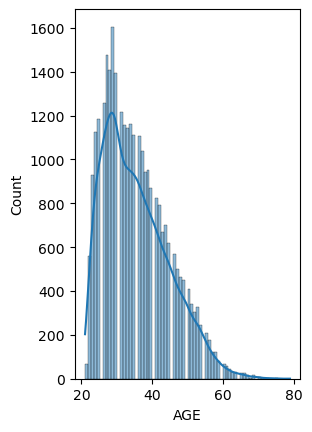

In [111]:
plt.subplot(1,2,1)
sns.histplot(credit.AGE, kde=True)

<Axes: xlabel='AGE'>

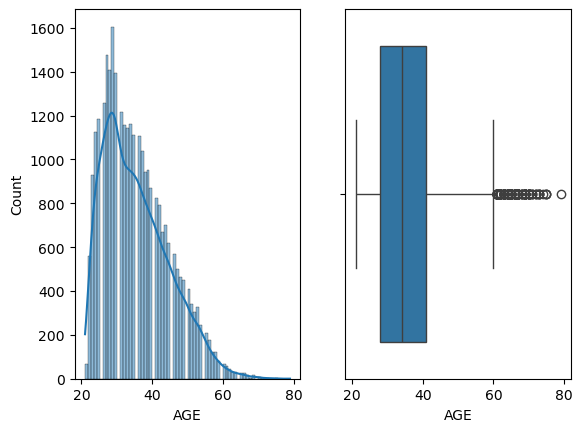

In [112]:
plt.subplot(1,2,1)
sns.histplot(credit.AGE, kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='AGE',data=credit)

From the above descriptive statistics and plots, we see that the Age field is right skewed and has outliers

Hence, if we have to impute values, median will be the right statistics to impute

Let us check how many values are missing

In [113]:
credit.isnull().sum()

ID               0
LIMIT_BAL        0
GENDER           0
EDUCATION        0
MARRIAGE         0
AGE             12
PAY_SEP          0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEP     0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEP      0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
DEFAULT          0
dtype: int64

Only Age field has 12 missing values

In [114]:
## Let's extract the rows which have missing values
credit[credit.AGE.isnull()]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
5,6,50000,1,1,2,NaN,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
21,22,120000,2,2,1,NaN,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
31,32,50000,1,2,2,NaN,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1718,1500,1000,1000,1000,716,1
63,64,50000,2,2,1,NaN,0,0,0,-2,-2,-2,28718,29166,0,0,0,0,1000,0,0,0,0,0,1
409,410,280000,1,1,2,NaN,0,0,0,0,0,0,168382,175646,180650,182672,168399,167983,10000,8000,6371,6217,5947,6288,0
430,431,90000,2,2,2,NaN,0,0,0,0,0,0,91894,71732,73241,74424,76070,77648,3200,3300,3000,3001,3000,3100,0
3110,3111,100000,1,2,1,NaN,0,0,0,0,0,0,81415,80759,79755,81209,60720,74375,4000,3000,3004,2278,15000,3000,0
3118,3119,60000,2,2,1,NaN,0,0,0,0,0,0,57033,58994,59732,36914,37684,38613,2880,2473,1322,1366,1554,1369,0
3199,3200,180000,1,2,2,NaN,1,-2,-2,-2,-2,-2,149172,100466,98458,89384,88315,84320,4600,4207,3500,4000,5000,602,1
3216,3217,20000,2,1,2,NaN,2,2,2,2,2,2,9317,18576,18219,17095,19748,18722,10000,800,0,3500,0,1000,1


Our objective in this problem to predict 'Default'

With current data, lets check if the 'Age' statistics is significantly different for Default=0 and Default=1


<Axes: xlabel='DEFAULT', ylabel='AGE'>

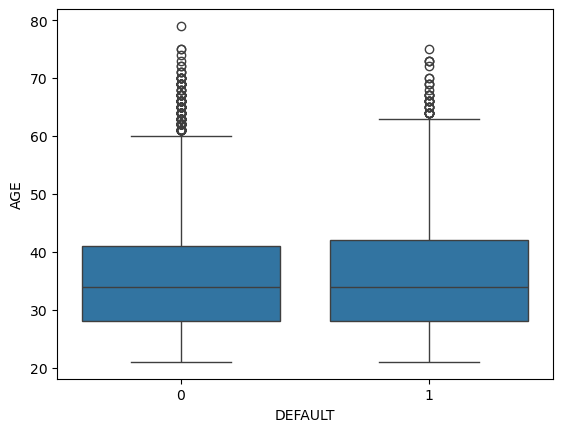

In [115]:
sns.boxplot(x='DEFAULT', y = 'AGE', data=credit)

From the above plot we observe that there is no significant difference. Hence, we can impute the missing values with overall median value rather than picking up separate median values for DEFAULT=0 and DEFAULT=1

In [116]:
credit['AGE'] = credit['AGE'].fillna(credit['AGE'].median())
credit[credit['AGE'].isnull()]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT


Categorical Fields

In [117]:
credit['GENDER'].value_counts()

GENDER
2    18112
1    11888
Name: count, dtype: int64

In [118]:
credit['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

As per data dictionary there is no mention of Marital Status being 0. Lets see how this field influences the dependent variable 'DEFAULT'

In [119]:
pd.crosstab(credit.DEFAULT, credit.MARRIAGE, margins=True, normalize=True)

MARRIAGE,0,1,2,3,All
DEFAULT,,,,,
0,0.001633,0.348433,0.420767,0.007967,0.7788
1,0.000167,0.106867,0.111367,0.002800,0.2212
All,0.001800,0.455300,0.532133,0.010767,1.0000


Only 0.18% (54) of the overall records has a value of 0
If we impute this with mode value of 2, there will be a slight increase in the proportion of level 2
As we have 30000 records in hand out of which only 54 have 0 values, we can go ahead and drop these rows instead of changing the data

In [120]:
credit = credit[credit.MARRIAGE != 0]

In [121]:
credit.head(100)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,1,20000,2,2,1,24.0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,90000,1,2,2,35.0,0,0,0,0,0,0,83725,85996,87653,35565,30942,30835,3621,3597,1179,1112,1104,1143,0
96,97,360000,1,1,1,43.0,-1,-1,-1,-1,-1,0,3967,8322,3394,6451,26370,9956,8339,3394,12902,27000,0,68978,0
97,98,150000,1,1,2,27.0,0,0,0,0,0,0,86009,86108,89006,89775,87725,40788,4031,10006,3266,4040,1698,800,0
98,99,50000,2,3,1,22.0,0,0,0,0,0,0,18722,18160,16997,13150,8866,7899,1411,1194,379,281,321,197,0


As we have removed few rows from the dataframe, the index is not continuous

Need to reset the index to get the continuous values

In [122]:
credit.reset_index(drop=True, inplace=True)

In [123]:
#credit.head()

In [124]:
#credit.tail()

In [125]:
credit.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
Name: count, dtype: int64

In [126]:
credit.EDUCATION.value_counts()

EDUCATION
2    14024
1    10581
3     4873
5      280
4      123
6       51
0       14
Name: count, dtype: int64

5 and 6 correspond to 'Unknown'. So we can replace all 6 to 5.
There are only 14 records with 0 value. We can replace even 0 to 'Unknown' category as currently we dont know what it stands for. In future, if data for 'Unknown' Education has to be found, the ones with value 0 will also be included.

In [127]:
credit.EDUCATION.replace(to_replace=6, value=5, inplace=True)

C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2131576323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit.EDUCATION.replace(to_replace=6, value=5, inplace=True)
C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2131576323.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cr

In [128]:
credit.EDUCATION.replace(to_replace=0, value=5, inplace=True)

In [129]:
credit.EDUCATION.value_counts()

EDUCATION
2    14024
1    10581
3     4873
5      345
4      123
Name: count, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Define a function to retrieve count of levels within each category
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
def get_level_counts(i):
    print(credit[i].value_counts())

In [131]:
PAY_X = ['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEP']

In [132]:
for f in PAY_X:
    get_level_counts(f)

PAY_APR
0     16265
-1     5726
-2     4883
2      2760
3       183
4        49
7        46
6        19
5        13
8         2
Name: count, dtype: int64
PAY_MAY
0     16922
-1     5528
-2     4534
2      2621
3       177
4        84
7        58
5        17
6         4
8         1
Name: count, dtype: int64
PAY_JUN
0     16436
-1     5673
-2     4336
2      3150
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: count, dtype: int64
PAY_JUL
0     15745
-1     5925
-2     4074
2      3810
3       238
4        76
7        27
6        23
5        21
1         4
8         3
Name: count, dtype: int64
PAY_AUG
0     15708
-1     6035
2      3919
-2     3774
3       326
4        98
1        28
5        25
7        20
6        12
8         1
Name: count, dtype: int64
PAY_SEP
0     14717
-1     5671
1      3681
-2     2752
2      2663
3       322
4        76
5        25
8        19
6        11
7         9
Name: count, dtype: int64


In [133]:
credit.DEFAULT.value_counts(normalize=True)

DEFAULT
0    0.778568
1    0.221432
Name: proportion, dtype: float64

Lets replace the values of some of the categorical variable with meaningful labels so it eases our EDA process and helps in getting insights.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Replace the values of some of the categorical variable with meaningful labels so it eases our EDA process and helps in getting insights.
                        
                        
* Note: Check data description to replace numbers with appropriate categories.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
credit.GENDER.replace(to_replace=1, value='M', inplace=True)
credit.GENDER.replace(to_replace=2, value='F', inplace=True)

C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2745508658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit.GENDER.replace(to_replace=1, value='M', inplace=True)
C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2745508658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [135]:
credit.EDUCATION.replace(to_replace=1, value='Grad', inplace=True)
credit.EDUCATION.replace(to_replace=2, value='Univ', inplace=True)
credit.EDUCATION.replace(to_replace=3, value='HSchool', inplace=True)
credit.EDUCATION.replace(to_replace=4, value='Others', inplace=True)
credit.EDUCATION.replace(to_replace=5, value='Unknown', inplace=True)

In [136]:
credit.MARRIAGE.replace(to_replace=1,value='Married', inplace=True)
credit.MARRIAGE.replace(to_replace=2,value='Single', inplace=True)
credit.MARRIAGE.replace(to_replace=3,value='Others', inplace=True)

C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2288361673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit.MARRIAGE.replace(to_replace=1,value='Married', inplace=True)
C:\Users\Classroom-3\AppData\Local\Temp\ipykernel_9584\2288361673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

#### Anomalies Check

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Check for Anomalies in data and treat them:
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
<b>Possible case</b>

<i> Customers who have negative Bill amount in last 3 months, have not defaulted in last 6 months but are still marked as defaulters</i>

In [137]:
credit[(credit.BILL_AMT_JUL < 0) & (credit.BILL_AMT_AUG < 0) & (credit.BILL_AMT_SEP < 0) & # Bill amount is -ve for last 3 months
        # Not defaulted for last 3 months
       (credit.PAY_JUL < 1) & (credit.PAY_AUG < 1) & (credit.PAY_SEP < 1) &
       (credit.DEFAULT == 1)] # marked as defaulters

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
3937,3946,500000,F,Grad,Single,35.0,-2,-2,-2,-2,-2,-2,-73,-73,-73,-73,-73,-73,0,0,0,0,0,0,1
6175,6187,200000,M,Grad,Single,33.0,-2,-2,-2,-2,-2,-2,-18,-18,-18,-18,-18,-18,0,0,0,0,0,0,1
7152,7165,320000,F,Grad,Single,32.0,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,0,-400,0,0,0,1,400,6083,1
16022,16047,10000,F,Univ,Single,40.0,-2,-2,-2,-1,-1,-1,-4,-4,-4,26,326,-87,0,0,30,300,1000,2000,1
17281,17308,360000,F,Univ,Single,36.0,-2,-2,-2,-1,-1,-2,-149,-149,-4,585,139,0,0,145,744,139,0,0,1
17797,17826,50000,M,Univ,Single,25.0,-2,-2,-2,-2,-2,-2,-1587,-5174,-2587,-2587,-2587,-2587,0,0,0,0,0,0,1
18929,18961,200000,F,Grad,Single,29.0,-2,-2,-2,-2,-2,-1,-792,-792,-792,-792,-792,69708,0,792,0,0,70500,1688,1
20012,20046,230000,F,Grad,Single,37.0,-2,-2,-2,-2,-2,-2,-18,-18,-18,-18,-18,-18,18,0,0,0,0,0,1
20119,20154,240000,F,Univ,Married,37.0,-2,-2,-2,-2,-2,-2,-150,-150,-150,-150,-150,-150,0,0,0,0,0,0,1
20259,20294,360000,F,Grad,Married,52.0,-2,-2,-2,-1,-1,-2,-3,-3,-3,1000,0,0,0,0,1003,0,0,0,1


In [138]:
credit_anom1 = credit[(credit.BILL_AMT_JUL < 0) & (credit.BILL_AMT_AUG < 0) & (credit.BILL_AMT_SEP < 0) & # Bill amount is -ve for last 3 months
       # Not defaulted for last 6 months
       (credit.PAY_JUL < 1) & (credit.PAY_AUG < 1) & (credit.PAY_SEP < 1) &
       (credit.DEFAULT == 1)]

In [139]:
#credit_anom1.describe(include='all').T

From above data we see that there are 19 customers who have a negative bill amount from JUL through SEP, they have never defaulted on repayment in last 6 months but are still marked as defaulters

Lets rectify these records and change them to non-defaulters

In [140]:
# Retrieve the index for the anomaly records
list_anom1 = credit_anom1.index
#list_anom1

In [141]:
# Mark anomaly records as non-defaulters
credit.DEFAULT = np.where(credit.index.isin(list_anom1), 0, credit.DEFAULT)

In [142]:
# 19 records have moved from defaulters to non-defaulters
credit.DEFAULT.value_counts()

DEFAULT
0    23334
1     6612
Name: count, dtype: int64

There may be additional anomalies in the data which can be verified and treated as above

#### Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. From the existing columns, we may be able to derive additional features which may be more relavant considering the objective to be achieved and may give us better insights; Derive such features from existing data as part of Feature Engineering
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
<b>Pointers</b>
<p>Repayment status columns which have greater value are more prone to become a defaulters. Sum all the Pay status and which will help to capture the risk of customer getting into default</p></br>
<b>Suggestion</b>
<p>find the average bill amount of the customers for last 6 months</p>
<p>find the average amount paid by the customers for last 6 months</p>


In [143]:
#credit['RISK_VALUE'] = credit['PAY_APR'] + credit['PAY_MAY'] + credit['PAY_JUN'] + credit['PAY_JUL'] + credit['PAY_AUG'] + credit['PAY_SEP']

In [144]:
#credit.RISK_VALUE.dtype

In [145]:
#credit.RISK_VALUE.unique()

In [146]:
#credit['RISK_VALUE']= credit['RISK_VALUE'].astype(int)

In [147]:
credit['AVG_6_MONTHS_BILL'] = (credit.BILL_AMT_APR + credit.BILL_AMT_MAY + 
                               credit.BILL_AMT_JUN + credit.BILL_AMT_JUL + 
                               credit.BILL_AMT_AUG + credit.BILL_AMT_SEP)/6

In [148]:
credit['AVG_6_MONTHS_PAY'] = (credit.PAY_AMT_APR + credit.PAY_AMT_MAY + 
                              credit.PAY_AMT_JUN + credit.PAY_AMT_JUL + 
                              credit.PAY_AMT_AUG + credit.PAY_AMT_SEP)/6

Before we proceed with Data Visualization lets check our data again

In [149]:
credit.shape

(29946, 27)

In [150]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29946 non-null  int64  
 1   LIMIT_BAL          29946 non-null  int64  
 2   GENDER             29946 non-null  object 
 3   EDUCATION          29946 non-null  object 
 4   MARRIAGE           29946 non-null  object 
 5   AGE                29946 non-null  float64
 6   PAY_SEP            29946 non-null  object 
 7   PAY_AUG            29946 non-null  object 
 8   PAY_JUL            29946 non-null  object 
 9   PAY_JUN            29946 non-null  object 
 10  PAY_MAY            29946 non-null  object 
 11  PAY_APR            29946 non-null  object 
 12  BILL_AMT_SEP       29946 non-null  int64  
 13  BILL_AMT_AUG       29946 non-null  int64  
 14  BILL_AMT_JUL       29946 non-null  int64  
 15  BILL_AMT_JUN       29946 non-null  int64  
 16  BILL_AMT_MAY       299

In [ ]:
credit.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,29946.0,NaN,NaN,NaN,14999.138015,8659.57103,1.0,7499.25,14997.5,22495.75,30000.0
LIMIT_BAL,29946.0,NaN,NaN,NaN,167546.573165,129807.831678,10000.0,50000.0,140000.0,240000.0,1000000.0
GENDER,29946,2,F,18072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29946,5,Univ,14024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29946,3,Single,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,29946.0,NaN,NaN,NaN,35.4813,9.217395,21.0,28.0,34.0,41.0,79.0
PAY_SEP,29946.0,11.0,0.0,14717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_AUG,29946.0,11.0,0.0,15708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_JUL,29946.0,11.0,0.0,15745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_JUN,29946.0,11.0,0.0,16436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Assumptions to be clarified from data using EDA:</h1>
<p>
1.	Are customers with a higher ‘LIMIT_BAL’ tending towards non credibility? They have a higher credit limit and are spending accordingly. However, when it comes to repayment maybe they are not able to pay back
</p>
<p>
2.	Are customers with lower education levels, earning less and not able to pay back the bill and hence tending towards default/non-credibility
</p>
<p>
3.	Are young customers taking undue advantage of the credit limit, spending lavishly but not paying back
4.	Are married customers becoming non credible due to increased family responsibility.
</p>

#### Data Visualization

Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Perform univariate analysis on bill amount fields.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
credit.BILL_AMT_AUG.describe()

count     29946.000000
mean      49224.542744
std       71219.298988
min      -69777.000000
25%        2988.250000
50%       21221.000000
75%       64108.000000
max      983931.000000
Name: BILL_AMT_AUG, dtype: float64

<AxesSubplot:xlabel='BILL_AMT_AUG'>

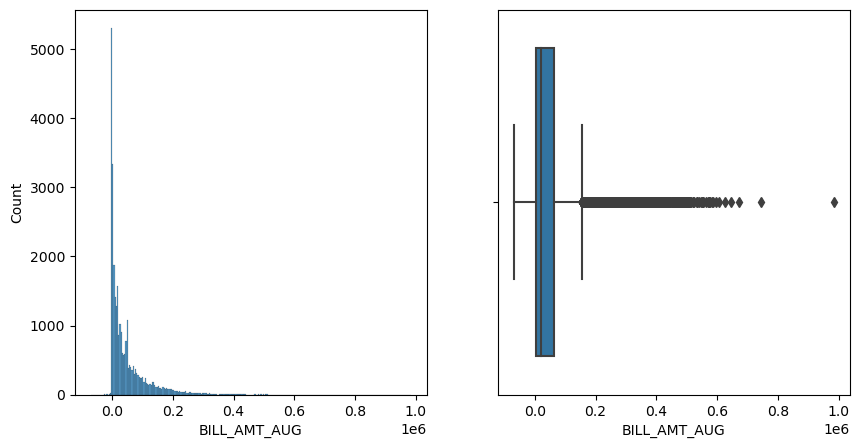

In [ ]:
fig_dims = (10, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(credit.BILL_AMT_AUG, kde=False, ax=axs[0])
sns.boxplot(x= 'BILL_AMT_AUG', data=credit, ax=axs[1])

In [ ]:
credit.PAY_AMT_SEP.describe()

count     29946.000000
mean       5659.736826
std       16552.642231
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5007.000000
max      873552.000000
Name: PAY_AMT_SEP, dtype: float64

<AxesSubplot:xlabel='PAY_AMT_SEP'>

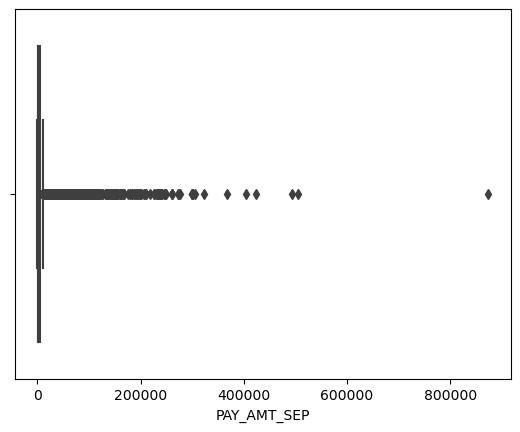

In [ ]:
sns.boxplot(x= 'PAY_AMT_SEP', data=credit)

Amount fields are highly skewed with many outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Give additional information on categorical variables.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
credit_cat = credit.select_dtypes('object')

In [ ]:
credit_cat.describe(include='all')

,GENDER,EDUCATION,MARRIAGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
count,29946,29946,29946,29946,29946,29946,29946,29946,29946,29946
unique,2,5,3,11,11,11,11,10,10,2
top,F,Univ,Single,0,0,0,0,0,0,0
freq,18072,14024,15964,14717,15708,15745,16436,16922,16265,23334


#### Insights:

The dataset has more female customers

Majority of the customers are Single

In PAY_X fields we observe there are only 10 levels in PAY_APR and PAY_MAY. However, the number of levels increase to 11 from JUN onwards. Also, in all months we see maximum number of customers with '0' repayment status which indicates that most of the customers are using revolving credit

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. 'PAY_X' field provide information on repayment status.

Lets consider that:</br>
- If customer does not may for upto 3 months (1,2,3) he/she is in delinquency state and beyond that he/she is considered as defaulter

Lets compare the delinquency and default status of the customers across months to see the trend
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

(0.0, 4000.0)

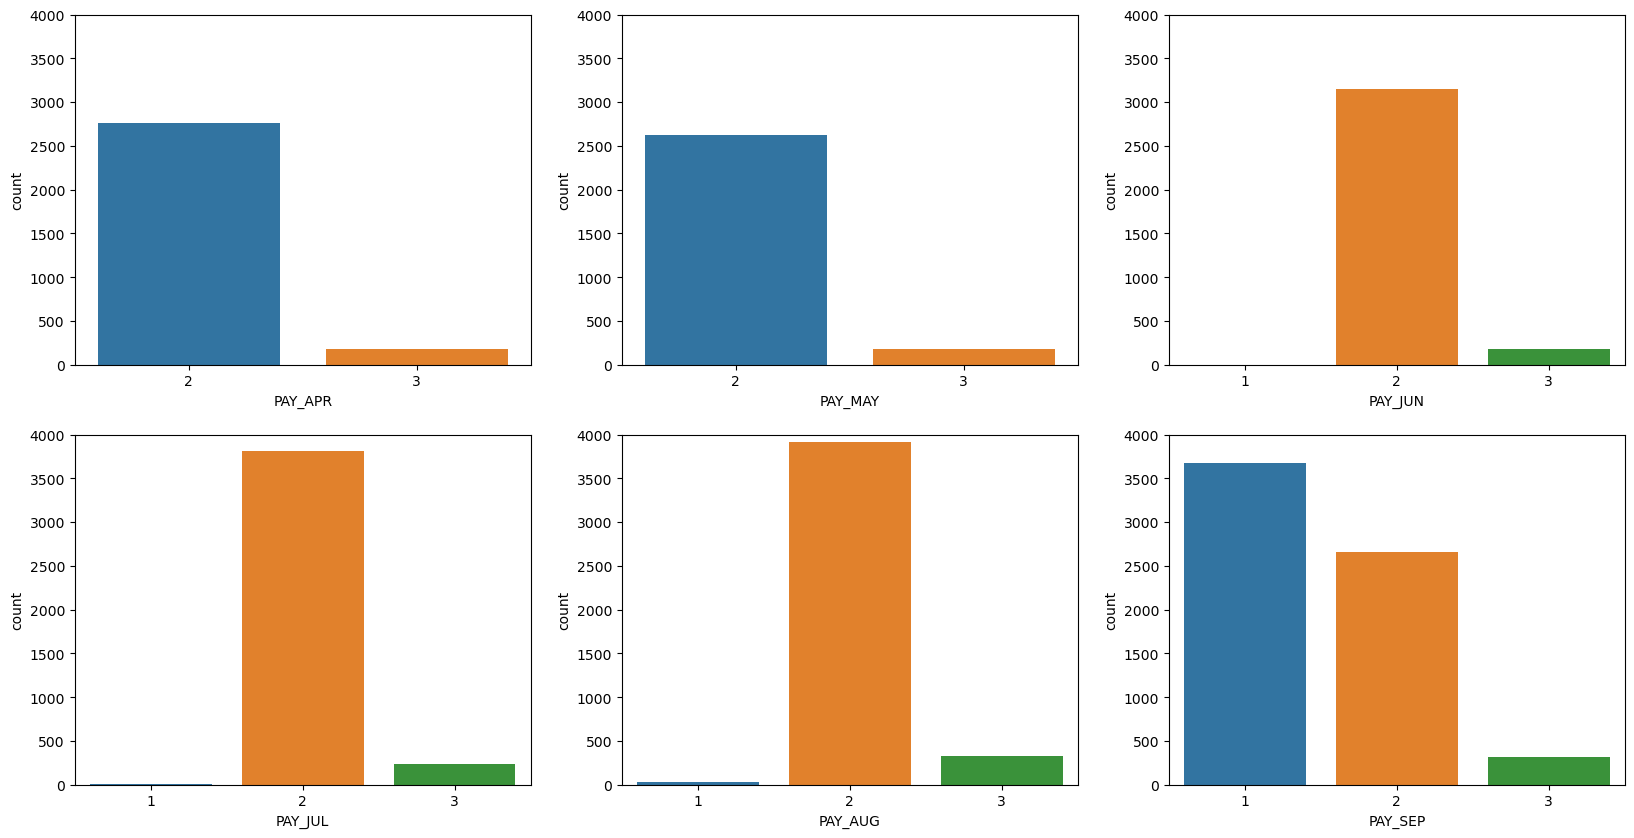

In [ ]:
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.countplot(x="PAY_APR", data=credit, order=credit.PAY_APR.value_counts().sort_index().iloc[3:5].index,
              ax=axs[0][0]).set_ylim(0,4000)
sns.countplot(x="PAY_MAY", data=credit, order=credit.PAY_MAY.value_counts().sort_index().iloc[3:5].index,
              ax=axs[0][1]).set_ylim(0,4000)
sns.countplot(x="PAY_JUN", data=credit, order=credit.PAY_JUN.value_counts().sort_index().iloc[3:6].index,
              ax=axs[0][2]).set_ylim(0,4000)
sns.countplot(x="PAY_JUL", data=credit, order=credit.PAY_JUL.value_counts().sort_index().iloc[3:6].index,
              ax=axs[1][0]).set_ylim(0,4000)
sns.countplot(x="PAY_AUG", data=credit, order=credit.PAY_AUG.value_counts().sort_index().iloc[3:6].index,
              ax=axs[1][1]).set_ylim(0,4000)
sns.countplot(x="PAY_SEP", data=credit, order=credit.PAY_SEP.value_counts().sort_index().iloc[3:6].index,
              ax=axs[1][2]).set_ylim(0,4000)

#### Insights

In Apr and May there are no customers with delinquency of 1 month. We start seeing increase in this number from Jun through Sep, Sep has reached its highest value of 3500+

Delinquency of 2 months shows a continuous increase from May through Aug. However, in Sep this has reduced and seems like few  customers have started paying the bills as shift of numbers is not from 2 to 3

Delinquency of 3 months has not increased much from Apr to Sep and is within 500


(0.0, 100.0)

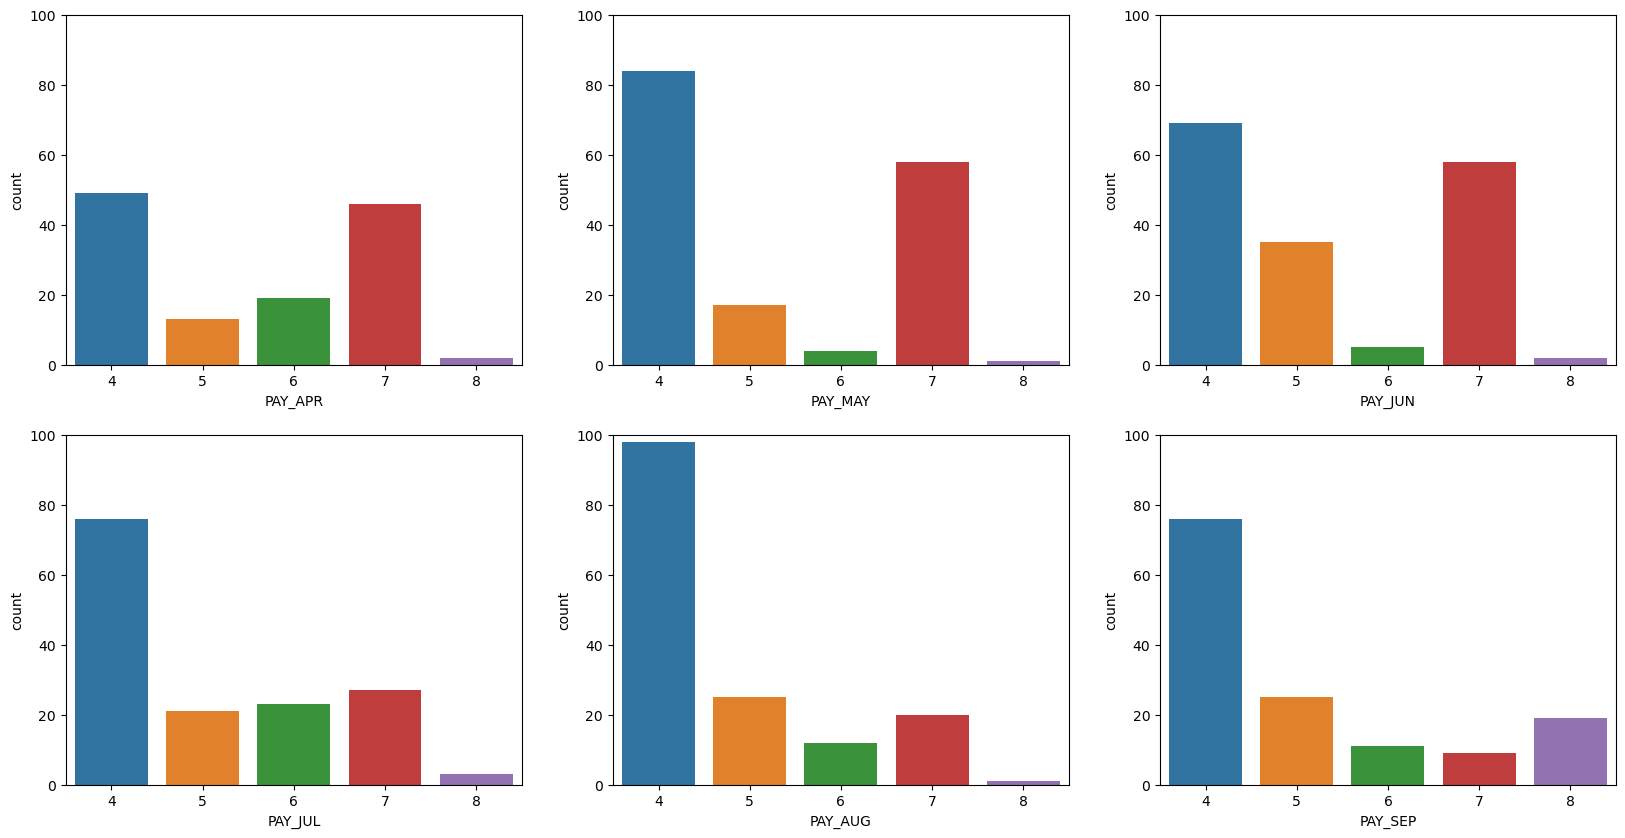

In [ ]:
fig_dims = (20, 10)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.countplot(x="PAY_APR", data=credit, order=credit.PAY_APR.value_counts().sort_index().iloc[5:10].index,
              ax=axs[0][0]).set_ylim(0,100)
sns.countplot(x="PAY_MAY", data=credit, order=credit.PAY_MAY.value_counts().sort_index().iloc[5:10].index,
              ax=axs[0][1]).set_ylim(0,100)
sns.countplot(x="PAY_JUN", data=credit, order=credit.PAY_JUN.value_counts().sort_index().iloc[6:11].index,
              ax=axs[0][2]).set_ylim(0,100)
sns.countplot(x="PAY_JUL", data=credit, order=credit.PAY_JUL.value_counts().sort_index().iloc[6:11].index,
              ax=axs[1][0]).set_ylim(0,100)
sns.countplot(x="PAY_AUG", data=credit, order=credit.PAY_AUG.value_counts().sort_index().iloc[6:11].index,
              ax=axs[1][1]).set_ylim(0,100)
sns.countplot(x="PAY_SEP", data=credit, order=credit.PAY_SEP.value_counts().sort_index().iloc[6:11].index,
              ax=axs[1][2]).set_ylim(0,100)

#### Insights

Defaulters corresponding to 4 months have increased in May. In Jun there is a decrease, but seems like these customers have contributed to 5 month defaulters. Number of 4 months defaulters further increased in Jul and Aug. However, there seems to be some improvemnt in Sep.

Defaulters for 7 months seem to be coming under control as the numbers have decreased significantly. However, there seems to be slight increase in 8 months defaulters in Sep

Bivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Perform Bi-variate analysis on amount billed and payed</b>
                </font>
            </div>
        </td>
    </tr>
</table>

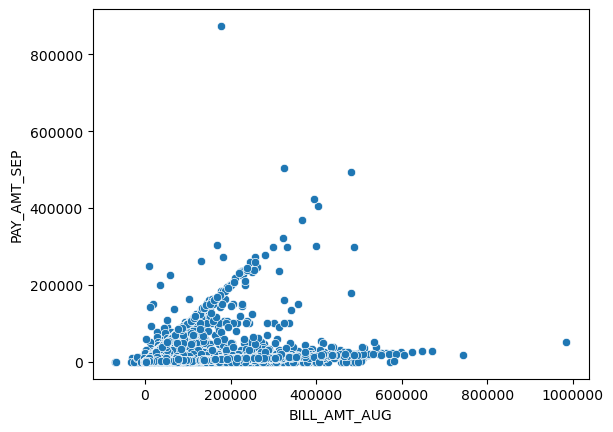

In [ ]:
sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', data=credit)
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='BILL_AMT_JUL', ylabel='PAY_AMT_AUG'>

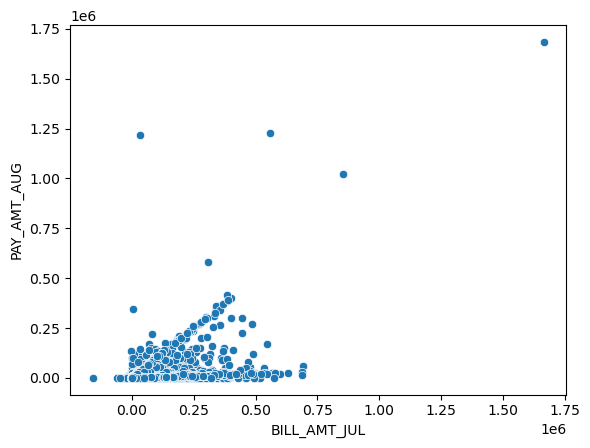

In [ ]:
sns.scatterplot(x='BILL_AMT_JUL', y='PAY_AMT_AUG', data=credit)

#### Insights:

From above plots we see that as the bill amount increases, there are some points where pay amount also increases porpotionally.These are customers who are paying on time.

However, few points below it indicate partial payment instead of full payment.

The points corresonding to the 0 (y value) are the ones not paying the bills

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Perform Bi-variate analysis on LIMIT_BAL and billed amount</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='BILL_AMT_SEP'>

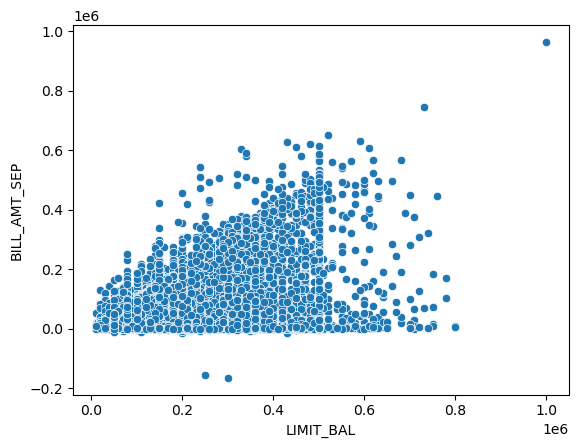

In [ ]:
sns.scatterplot(x='LIMIT_BAL', y='BILL_AMT_SEP', data=credit)

#### Insights:

From the above plot we see that not many customers are utilizing the credit beyond the specified limit. There are many customers with 0 bill amount but having a Limit_Bal upto 800000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Analyse the pair wise relation between all numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
credit_num = credit.select_dtypes(['float64', 'int64','int32'])
credit_num = credit_num.drop('ID', axis=1)

In [ ]:
sns.pairplot(credit_num)

In [ ]:
corr = credit_num.corr()
round(corr,2)

In [ ]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(round(corr,2), annot=True, mask=mask)

#### Insights
We observe bill amounts are highly correlated with each other. Especially the consecutive months bill amount have a correlation of more than 0.9

There is a weak correlation between the bill amount of a month and the pay amount of consecutive month (around 0.3) indicating that most of the time payments are not made according to bill amount

RISK_VALUE shows negative correlation with LIMIT_BAL indicating that higher risk may be associated with customers who have a lower credit balance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Check which numeric variables hare impacting target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=credit, ax=axs[0])
sns.boxplot(x='DEFAULT', y='BILL_AMT_SEP', data=credit, ax=axs[1])
sns.boxplot(x='DEFAULT', y='AGE', data=credit, ax=axs[2])

#### Insights

We see that median value of the LIMIT_BAL for defaulters is less compared to that of non-defaulters

There is no difference in median age or median Sep bill amount between defaulters and non defaulters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Perform Bi-variate analysis on PAY_SEP vs AVG_6_Months_Bill</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
fig = plt.subplots(figsize=(15,6))
sns.boxplot(x='PAY_SEP', y='AVG_6_MONTHS_BILL', data=credit)

### Insights:

Median of 6 month average bill is higher for customers who have defaulted for 6 to 7 months

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check if Education and Target show any relationship</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
sns.countplot(x='EDUCATION', hue='DEFAULT', data=credit)

In [ ]:
pd.crosstab(credit.DEFAULT, credit.EDUCATION, margins=True,normalize=True)

#### Insights

Out of 22% of customers who have defaulted,  11% are University Graduates

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check if Marriage and Target show any relationship</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=credit)

In [ ]:
pd.crosstab(credit.MARRIAGE, credit.DEFAULT, margins=True, normalize=True)

#### Insights

There is no major difference between default count of Single and Married customers

In [ ]:
pd.crosstab(credit.GENDER, credit.PAY_SEP, margins=True, normalize=True)

#### Insights

9% of the customers are not using the credit facility

18.93% customers are duly paying thier bills. Out of this 11.8% are female customers while 7% are male customers.

If we observe the delinquency status (default by 1 or 2 months), percentage of female customers is comparatively higher

If we observe defaults for more than 6 months there is no major difference in percentage between the male and female customers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the total amount billed in August, total amount payed in September, total number of customers who paid in September, Due amount after substracting the paid amount from billed amount, due amount per customer.
            </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
temp_df = pd.DataFrame(credit.groupby('PAY_SEP')['BILL_AMT_AUG'].sum())
temp_df.rename(columns={'BILL_AMT_AUG': 'TOTAL_BILL_AMT_AUG'}, inplace=True)
temp_df['TOTAL_PAY_AMT_SEP'] = credit.groupby('PAY_SEP')['PAY_AMT_SEP'].sum()
temp_df['NUMBER of CUSTOMERS'] = credit.groupby('PAY_SEP')['PAY_SEP'].agg('count')
temp_df['DUE_AMT'] = temp_df['TOTAL_BILL_AMT_AUG'] - temp_df['TOTAL_PAY_AMT_SEP']
temp_df['DUE_AMT/CUSTOMER'] = round(temp_df['DUE_AMT']/temp_df['NUMBER of CUSTOMERS'],2)
temp_df.head(12)

### Insight

For the month of September:

If there are 2752 customers with status as -2 (inactive or have no consumption), need to check on the amount value that is coming up from the data. Maybe these are amounts being carried forward since the account is inactive. Since the number of records is high need to consult business before taking any action on this data.

Also, there are 5671 customers with status of -1. Seems like these are customers who are paying the bills but may not be paying the entire bill amount as due amount/customer is comparatively on lower side.

We see that number of customers with repayment status as 0 (making use revolving credit) is highest and even the due amount is highest for this group. However, if we consider due amount/customer it is not very high.

The number of customers who have defaulted for more than 3 months is low (PAY_SEP>3) but the due amount/customer is higher which is a concern.

Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Check for relation between bill amount august, paid amount in september and target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', hue='DEFAULT', data=credit)

### Insight
We see more number of defaulters with higher bill amounts ranging between 300000 through 600000

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>21. Check relation between amount paid in September, age, risk value and target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
g = sns.FacetGrid(credit, col="PAY_SEP", hue='DEFAULT',col_wrap=3, height=3)
g = g.map(plt.scatter, "AGE", 'RISK_VALUE')

#### Insights

Risk is higher for customers who have not done repayment for 2 months or more. For repayment status of -2, -1 and 0 we see the risk is quite low

From the plot we see that there are not many defaulters with age > 60 years. Major chunk of defaulters are young

Risk is also not high for customer with age > 60

As we are checking the repayment status of Sep, there seems to be very few customers with high risk and not done repayment for more than 5 months

Most of the high risk customers are defaulters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>22. Summarize the insights obtained from all the EDA Steps</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Summary observations from EDA:

• Majority of the customers are female customers and also most of the customers are Single.

• There are customers who are making advance payments which is indicated by the negative value in the Bill Amount field indicating these are credible customers.

• Most of the defaulters are of < 60 years of age

• Clarification to the assumptions or intuitions we had before EDA:

    • Are customers with a higher ‘LIMIT_BAL’ tending towards non credibility? They have a higher credit limit and are spending accordingly. However, when it comes to repayment maybe they are not able to pay back
    -> RISK_VALUE shows negative correlation with LIMIT_BAL indicating that higher risk may be associated with customers who have a lower credit balance
    -> We see that median value of the LIMIT_BAL for defaulters is less compared to that of non-defaulters
    
    • Are customers with lower education levels, earning less and not able to pay back the bill and hence tending towards default/non-credibility
    -> Out of 22% of customers who have defaulted, 11% are University Graduates. So our assumption of lower educated customers being a problem is not very true
    
    • Are young customers taking undue advantage of the credit limit, spending lavishly but not paying back
    -> There is no difference in median age between defaulters and non-defaulters
    
    • Are married customers becoming non credible due to increased responsibility of family.
    -> There is no major difference between default count of Single and Married customers
    
• In all months we see maximum number of customers with '0' repayment status which indicates that most of the customers are using revolving credit. Also, for the month of Sep we observed that even the due amount is highest for this group. This is the group of customers where majority of the company’s amount has to be recovered. We also observe that not many customers are utilizing the credit beyond the specified limit hence not getting called out.

    -> Action: For the customers who are using revolving credit and have a bill amount tending to breach the credit limit over past 3 months, company can cross sell and provide options of fixed repayment or EMI or loan bat competitive interest rate so that the customer does not tend towards default status
    
• As on Sep around 9% of the customers are not using the credit facility.

    -> Action: Potential customers who can be pitched in with offers for credit card sale
    
• The number of customers who have defaulted for more than 3 months is low but the due amount/customer is higher which is a concern.
    
    -> Action: Recovery measures to be initiated for these customers

### Data Preparation

As the numeric fields in this data have many outliers and are highly skewed, we need to choose a machine learning technique that is not very sensitive to the outliers.

In case we have to choose technique which expects data to be normal, we can apply transformation techniques to reduce the skewness. Note: Use one transformation technique for all numeric field.

Further, outliers can be capped to a value such that there is no major change in the data distribution (Check the data summary before and after the outlier treatment)

Scaling may be required if a distance based or weight based technique is chosen. Z Score or Standard Scalar method is the most commonly used method for scaling

The categorical levels in the current case study are not many. Hence, One Hot Encoding can be applied for the categorical fields.

### Summary

#### EDA helps in getting insights from Data :

Quality : We found features that had missing values, bad data which had to be cleaned. We also found anomalies in the data based on the business context which had to be treated.

Quantum of Data: We know about how many valid observations and relevant features are available to proceed with the prediction. We also understand that there is a data imbalance (only 22% of the observations correspond to defaulters). This will help in understanding some of the model evaluation parameters better and give us an idea on how the model performance can be improved further.

Several statistical measurements and distributions corresponding to categorical and numeric features. This can be useful is choosing an apporpriate technique to build the classification model which is the next step.

Frequency and distribution of the features. This will help us validate the assumptions that are made before implementing a technique.

Relevance of data w.r.t the objective: Univariate, Bivariate, Multivariate analysis helps us understand if the features will indeed help in classifying the defaulters

A thorough EDA helps to avoid any bad data leakage to further steps. It also, helps us understand the current business situation and already gives us an insight on several parameters. It helps us be more confident in taking decisions while we move further implementing the several predictive modelling and machine learning techniques